<a href="https://colab.research.google.com/github/Shiladitya56/Machine-Learning/blob/main/SEM3/Natural%20Language%20Processing/ESE1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Shiladitya **2348556** (Q1)🙃

### Import necessary libraries

In [242]:
import torch
import torch.nn as nn
import numpy as np
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import pandas as pd
from nltk.tokenize import word_tokenize
import nltk
import matplotlib.pyplot as pt

In [243]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### This Spammy Spammy Spammy World!

In [244]:
df = pd.read_csv('spam.csv')
df = df[['v1', 'v2']]
df.rename(columns={'v1':'label', 'v2':'text'}, inplace=True)
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Encoded spam to 1 and ham to 0.

In [245]:
df.replace({'spam':1, 'ham':0}, inplace=True)
df.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [246]:
df['label'].value_counts()

label
0    4825
1     747
Name: count, dtype: int64

### Distribution shows class imbalance.

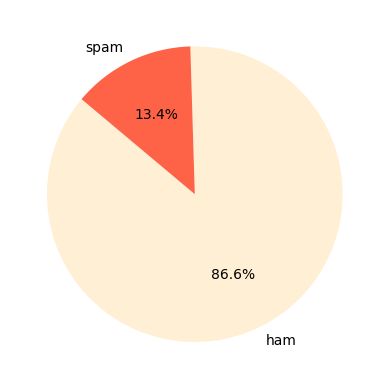

In [262]:
pt.pie(df['label'].value_counts(), labels=['ham', 'spam'], autopct='%1.1f%%', startangle=140, colors=['papayawhip', 'tomato']);

In [247]:
ham_df = df[df['label'] == 0].sample(n=1000, random_state=42)
spam_df = df[df['label'] == 1].sample(n=1000, random_state=42, replace=True)
bdf = pd.concat([ham_df, spam_df])
bdf = bdf.sample(frac=1, random_state=42).reset_index(drop=True)

In [248]:
bdf['label'].value_counts()

label
1    1000
0    1000
Name: count, dtype: int64

### Handled class imbalance.

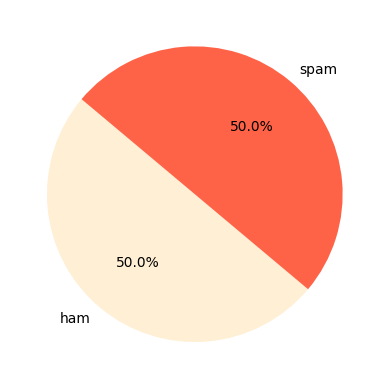

In [263]:
pt.pie(bdf['label'].value_counts(), labels=['ham', 'spam'], autopct='%1.1f%%', startangle=140, colors=['papayawhip', 'tomato']);

### Defining custom `RNN` architecture.

In [249]:
class RNNmodel(nn.Module):
  def __init__(shila, out_size):
    super().__init__()
    shila.fc1 = nn.Linear(1024, 512)
    shila.bn1 = nn.BatchNorm1d(1)
    shila.rnn1 = nn.RNN(512, 256)
    shila.fc2 = nn.Linear(256, 128)
    shila.bn2 = nn.BatchNorm1d(1)
    shila.rnn2 = nn.RNN(128, 128)
    shila.fc3 = nn.Linear(128, 64)
    shila.bn3 = nn.BatchNorm1d(1)
    shila.relu = nn.ReLU()
    shila.classifier = nn.Linear(64, out_size)

  def forward(shila, input_t):
    x = shila.fc1(input_t)
    x = shila.bn1(x)
    x = shila.relu(x)
    x, _ = shila.rnn1(x)
    x = shila.fc2(x)
    x = shila.bn2(x)
    x = shila.relu(x)
    x, _ = shila.rnn2(x)
    x = shila.fc3(x)
    x = shila.bn3(x)
    x = shila.relu(x)
    return shila.classifier(x)

### Defining custom `LSTM` architecture.

In [250]:
class LSTMmodel(nn.Module):
  def __init__(shila, out_size):
    super().__init__()
    shila.fc1 = nn.Linear(1024, 512)
    shila.bn1 = nn.BatchNorm1d(1)
    shila.lstm1 = nn.LSTM(512, 256)
    shila.fc2 = nn.Linear(256, 128)
    shila.bn2 = nn.BatchNorm1d(1)
    shila.lstm2 = nn.LSTM(128, 128)
    shila.fc3 = nn.Linear(128, 64)
    shila.bn3 = nn.BatchNorm1d(1)
    shila.relu = nn.ReLU()
    shila.classifier = nn.Linear(64, out_size)

  def forward(shila, input_t):
    x = shila.fc1(input_t)
    x = shila.bn1(x)
    x = shila.relu(x)
    x, _ = shila.lstm1(x)
    x = shila.fc2(x)
    x = shila.bn2(x)
    x = shila.relu(x)
    x, _ = shila.lstm2(x)
    x = shila.fc3(x)
    x = shila.bn3(x)
    x = shila.relu(x)
    return shila.classifier(x)

### Defining custom child class of `torch.utils.data.Dataset` to handle data flow.

In [251]:
class TextDataset(Dataset):
    def __init__(shila, texts, labels, max_vocab=1024):
        shila.texts = texts
        shila.labels = labels
        # Tokenize text and build vocabulary
        shila.vectorizer = CountVectorizer(tokenizer=word_tokenize,
                                           max_features=max_vocab,
                                           token_pattern=None)
        shila.vectorizer.fit(texts)

    def __len__(shila):
        return len(shila.texts)

    def __getitem__(shila, idx):
        text = shila.texts[idx]
        label = shila.labels[idx]
        # bag-of-words representation
        text_vector = shila.vectorizer.transform([text]).toarray()
        text_tensor = torch.tensor(text_vector, dtype=torch.float32)
        num_classes = len(np.unique(shila.labels))
        label_tensor = torch.zeros(num_classes)
        label_tensor[label] = 1
        return text_tensor, label_tensor

# Split data into train and test sets
train_texts, test_texts, train_labels, test_labels = train_test_split(bdf['text'], bdf['label'], test_size=0.33, random_state=6)
train_texts.reset_index(drop=True, inplace=True)
test_texts.reset_index(drop=True, inplace=True)
train_labels.reset_index(drop=True, inplace=True)
test_labels.reset_index(drop=True, inplace=True)
# Create datasets and loaders
train_dataset = TextDataset(train_texts, train_labels)
test_dataset = TextDataset(test_texts, test_labels)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1)

### Training `RNN` model.

In [252]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = RNNmodel(out_size=2)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
vizloss_rnn = []

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs).squeeze(dim=1)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
    epoch_loss = running_loss / len(train_loader.dataset)
    vizloss_rnn.append(epoch_loss)
    print(f"Epoch {epoch+1}/{num_epochs} ... Loss: {epoch_loss:.4f}")

# Evaluation
model.eval()
correct = 0
total = 0

with torch.no_grad():
    total = 0
    correct = 0
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs[0], 1)
        total += labels.size(0)
        if labels[0][predicted] == 1:
          correct += 1

accuracy = correct / total
rnn = accuracy*100
print(f"Test Accuracy: {rnn:.2f}%")

Epoch 1/10 ... Loss: 0.2990
Epoch 2/10 ... Loss: 0.0682
Epoch 3/10 ... Loss: 0.0259
Epoch 4/10 ... Loss: 0.0106
Epoch 5/10 ... Loss: 0.0053
Epoch 6/10 ... Loss: 0.0034
Epoch 7/10 ... Loss: 0.0024
Epoch 8/10 ... Loss: 0.0020
Epoch 9/10 ... Loss: 0.0015
Epoch 10/10 ... Loss: 0.0013
Test Accuracy: 78.79%


### Visualization of loss during training.

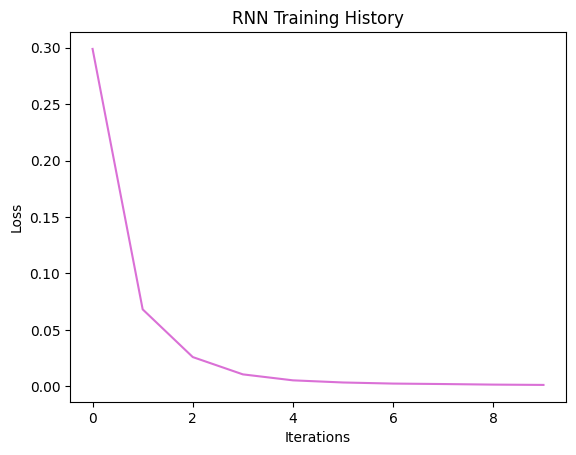

In [253]:
pt.plot(vizloss_rnn, color='orchid')
pt.xlabel('Iterations')
pt.ylabel('Loss')
pt.title('RNN Training History');

### Training `LSTM` model.

In [254]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = LSTMmodel(out_size=2)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
vizloss_lstm = []

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs).squeeze(dim=1)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
    epoch_loss = running_loss / len(train_loader.dataset)
    vizloss_lstm.append(epoch_loss)
    print(f"Epoch {epoch+1}/{num_epochs} ... Loss: {epoch_loss:.4f}")

# Evaluation
model.eval()  # Set the model to evaluation mode
correct = 0
total = 0

with torch.no_grad():
    total = 0
    correct = 0
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs[0], 1)
        total += labels.size(0)
        if labels[0][predicted] == 1:
          correct += 1

accuracy = correct / total
lstm = accuracy*100
print(f"Test Accuracy: {lstm:.2f}%")

Epoch 1/10 ... Loss: 0.4384
Epoch 2/10 ... Loss: 0.0737
Epoch 3/10 ... Loss: 0.0230
Epoch 4/10 ... Loss: 0.0074
Epoch 5/10 ... Loss: 0.0041
Epoch 6/10 ... Loss: 0.0026
Epoch 7/10 ... Loss: 0.0019
Epoch 8/10 ... Loss: 0.0015
Epoch 9/10 ... Loss: 0.0012
Epoch 10/10 ... Loss: 0.0010
Test Accuracy: 76.36%


### Visualization of loss during training.

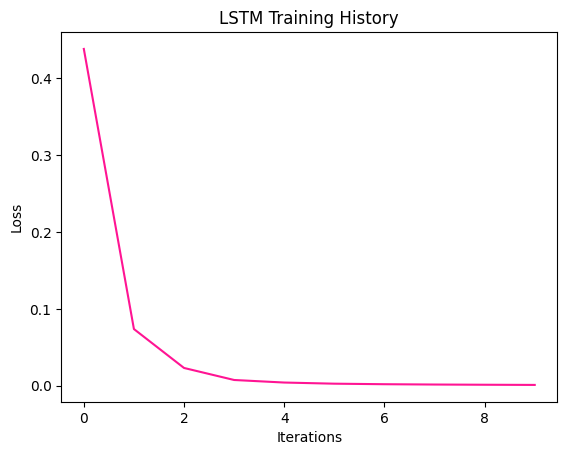

In [255]:
pt.plot(vizloss_lstm, color='deeppink')
pt.xlabel('Iterations')
pt.ylabel('Loss')
pt.title('LSTM Training History');

### Comparative analysis between `RNN` and `LSTM`.

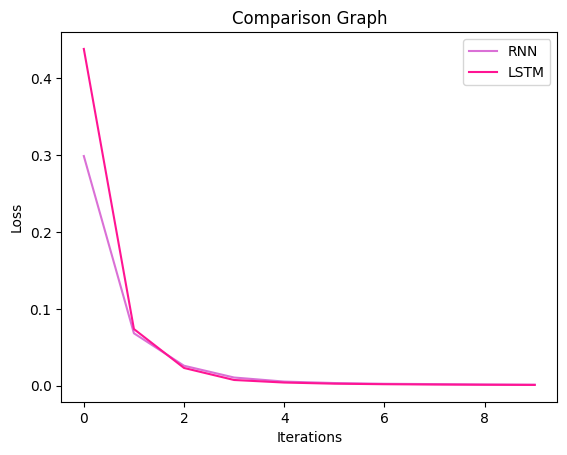

In [256]:
pt.plot(vizloss_rnn, color='orchid', label='RNN')
pt.plot(vizloss_lstm, color='deeppink', label='LSTM')
pt.title('Comparison Graph')
pt.xlabel('Iterations')
pt.ylabel('Loss')
pt.legend();

### Accuracy comparison on the Test dataset.

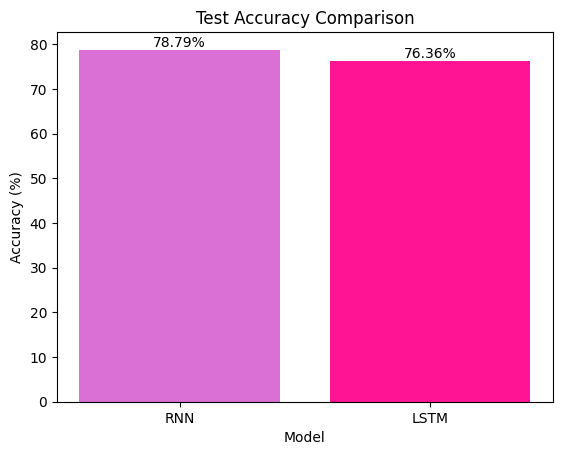

In [257]:
bars = pt.bar(['RNN', 'LSTM'], [rnn, lstm], color=['orchid', 'deeppink'])
pt.title('Test Accuracy Comparison')
pt.ylabel('Accuracy (%)')
pt.xlabel('Model');
for bar in bars:
  height = bar.get_height()
  pt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom')

##Analysis
We see that RNN performed better than LSTM here. This is because -

- RNNs are generally less complex than LSTMs and have fewer parameters to train. Since the dataset is relatively small or simple, the simpler model generalizes better. RNNs are often more efficient when dealing with simpler sequential patterns.

- Looking at the training history, we see that the LSTM model overfit on the training samples a bit. That further pulls down the accuracy on the testing set. This also happens since the dataset is very small. We can address this issue by introducing Dropout layers in the model.

- Data representation is another factor at play here. LSTMs excel at capturing long-term dependencies in sequential data. As the dataset primarily consists of short sentences with relatively simple patterns, the additional complexity of LSTM does not provide significant benefits over the simpler RNN architecture.